<a href="https://colab.research.google.com/github/osniramilton/SoulCodeAcademico/blob/soulcode/tratamento_inss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infra

## Instalação e importação das bibliotecas necessárias

In [ ]:
# Instalação do PYSPARK
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 58 kB/s 
     |████████████████████████████████| 199 kB 89.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=5246815b9bbad1773833c8b104f15bf85874a195e5a69fe7c1c2c37b11f2371b
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
# INSTALAÇÃO DA BIBLIOTECA GOOGLE CLOUD STORAGE SYSTEM
# (para fazer o upload dos datafiles no bucket da GCP, e também para acessá-los posteriormente)
!pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# IMPORTAR AS BIBLIOTECAS NECESSÁRIAS

# para acessar a GCP
from google.cloud import storage
import os

# para o mongoDB
import pymongo
from pymongo import MongoClient

# pyspark e pandas
from pyspark.sql import SparkSession
import pandas as pd

# importar funções úteis
import pyspark.sql.functions as F
from pyspark.sql.functions import regexp_replace, when, count, isnull

In [ ]:
# CONFIGURAÇÃO DA CHAVE DE SEGURANÇA
serviceAccount = '/content/aulas-bc26-jose-j-d865a94dcb2f.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

## Upload das bases de dados originais

### Upload para a GCP

In [ ]:
# FAZER O ACESSO A BUCKET
client = storage.Client()

# CRIAR UMA VARIÁVEL PARA RECEBER O NOME DA BUCKET
bucket = client.get_bucket('bc_26_jose_datasets')

# FAZER UPLOAD DO CSV, DISPONIBILIZADO PARA A ANÁLISE, PARA A BUCKET DO GOOGLE CLOUD
# blob = bucket.blob('D.SDA.PDA.005.CAT.202201_orig.csv')
# blob.upload_from_filename('D.SDA.PDA.005.CAT.202201_orig.csv')

'''
os três uploads ficaram separados como comentários para evitar que sejam executados novamente e 
se repita o upload
'''


In [ ]:
# blob = bucket.blob('D.SDA.PDA.005.CAT.202204_orig.csv')
# blob.upload_from_filename('D.SDA.PDA.005.CAT.202204_orig.csv')

In [ ]:
# blob = bucket.blob('D.SDA.PDA.005.CAT.202210_orig.csv')
# blob.upload_from_filename('D.SDA.PDA.005.CAT.202210_orig.csv')

### Criando os DataFrames a partir dos datasets na bucket do GCP 

In [ ]:
# FAZER O ACESSO A BUCKET
client = storage.Client()

# CRIAR UMA VARIÁVEL PARA RECEBER O NOME DA BUCKET 
# (coloquei o código aqui novamente caso não executemos mais a célula do upload)
bucket = client.get_bucket('bc_26_jose_datasets')

# Para acessar o arquivo que está na bucket
bucket.blob('D.SDA.PDA.005.CAT.202201_orig.csv')

# CRIAR UMA VARIÁVEL PARA RECEBER O CAMINHO DO ARQUIVO
path = 'gs://bc_26_jose_datasets/D.SDA.PDA.005.CAT.202201_orig.csv'

In [ ]:
df1 = pd.read_csv(path, sep=";", encoding='ISO-8859-1')

In [ ]:
df1

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,{ñ class},2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,...,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",2022/02,514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Goiás,2022/02,0000/00,24/02/2022,19/09/1986,01/03/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,{ñ class},S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/01,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152135,{ñ class},2022/04,000000-Não Informado,S82.6 Frat do Maleolo Lateral,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/04,2022/06,12/04/2022,08/11/1965,00/00/0000,00.000.000.000.000
152136,{ñ class},2022/04,000000-Não Informado,S82.1 Frat da Extremidade Proximal da Tibia,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/04,2022/06,30/04/2022,21/11/1985,00/00/0000,00.000.000.000.000
152137,{ñ class},2022/05,000000-Não Informado,S62.6 Frat de Outr Dedos,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/05,2022/06,05/05/2022,27/01/1992,00/00/0000,00.000.000.000.000
152138,{ñ class},2022/05,000000-Não Informado,S82.6 Frat do Maleolo Lateral,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/05,2022/06,15/05/2022,14/01/1975,00/00/0000,00.000.000.000.000


In [ ]:
# Para acessar o segundo arquivo
bucket.blob('D.SDA.PDA.005.CAT.202204_orig.csv')
path2 = 'gs://bc_26_jose_datasets/D.SDA.PDA.005.CAT.202204_orig.csv'

In [ ]:
df2 = pd.read_csv(path2, sep=";", encoding='ISO-8859-1')

In [ ]:
df2

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,{ñ class},2022/05,322205-Tec. de Enfermagem,Y28.2 Escolas Outr Instit Areas Admin Publica,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/05,0000/00,26/05/2022,13/11/1989,01/06/2022,57.571.275.002.570
1,Rua e Estrada - Superficie Utilizada para Sus,2022/05,992225-Auxiliar Geral de Conservação de Vias,S93.4 Entorse e Distensao do Tornozelo,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,...,Feminino,Trajeto,Maranhão,São Paulo,2022/05,0000/00,26/05/2022,19/04/1990,01/06/2022,57.571.275.002.570
2,{ñ class},2022/05,{ñ class},B34.2 Infecc p/Coronavirus Ne,8513,Ensino Fundamental,Empregador,Pa,Empregado,Não,...,Feminino,Doença,Maranhão,São Paulo,2022/05,0000/00,29/05/2022,13/09/1960,01/06/2022,47.715.347.000.184
3,"Revestimento Ceramico (Azulejo, Mosaico, Etc.",2022/05,783225-Ajudante de Motorista,S90.3 Contusao de Outr Partes e Partes Ne Do,4744,"Comercio Varejista de Ferragens, Madeira e Ma",Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/05,0000/00,31/05/2022,17/07/1994,01/06/2022,38.300.481.000.123
4,Calcada ou Caminho para Pedestre - Superficie,2022/05,322205-Tec. de Enfermagem,S51.0 Ferim do Cotovelo,8610,Atividades de Atendimento Hospitalar,Empregador,Pa,Empregado,Não,...,Feminino,Trajeto,Maranhão,São Paulo,2022/05,0000/00,30/05/2022,30/01/1992,01/06/2022,46.020.301.000.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89597,{ñ class},2022/04,000000-Não Informado,S82.6 Frat do Maleolo Lateral,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/04,2022/06,12/04/2022,08/11/1965,00/00/0000,00.000.000.000.000
89598,{ñ class},2022/04,000000-Não Informado,S82.1 Frat da Extremidade Proximal da Tibia,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/04,2022/06,30/04/2022,21/11/1985,00/00/0000,00.000.000.000.000
89599,{ñ class},2022/05,000000-Não Informado,S62.6 Frat de Outr Dedos,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/05,2022/06,05/05/2022,27/01/1992,00/00/0000,00.000.000.000.000
89600,{ñ class},2022/05,000000-Não Informado,S82.6 Frat do Maleolo Lateral,0,{ñ class},{ñ class},Auxílio Doenca por Acidente do Trabalho,{ñ class},{ñ,...,Masculino,Ignorado,Sergipe,Zerado,2022/05,2022/06,15/05/2022,14/01/1975,00/00/0000,00.000.000.000.000


In [ ]:
# Para acessar o terceiro
bucket.blob('D.SDA.PDA.005.CAT.202210_orig.csv')
path3 = 'gs://bc_26_jose_datasets/D.SDA.PDA.005.CAT.202210_orig.csv'

In [ ]:
df3 = pd.read_csv(path3, sep=";", encoding='ISO-8859-1')

In [ ]:
df3

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,"Faca, Facao- Ferramenta Manual sem Forca Motr",2022/10,848515-Desossador,S51.0 Ferim do Cotovelo,1011,"Abate de Reses, Exceto Suinos",Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Goiás,2022/10,0000/00,05/10/2022,05/11/1988,06/10/2022,00.000.000.000.000
1,"Aprision. Em, Sob ou Entre, Nic",2022/10,324115-Tec. em Radiologia e Imagenologia,S60.0 Contusao de Dedos s/Lesao da Unha,8610,Atividades de Atendimento Hospitalar,Empregador,Pa,Empregado,Não,...,Masculino,Típico,Maranhão,São Paulo,2022/10,0000/00,04/10/2022,02/02/1989,06/10/2022,00.000.000.000.000
2,"Andaime, Plataforma - Edificio ou Estrutura",2022/10,715210-Pedreiro,S62.8 Frat de Outr Partes e de Partes Ne Punh,4120,Construcao de Edificios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Santa Catarina,2022/10,0000/00,05/10/2022,07/02/1981,06/10/2022,00.000.000.000.000
3,Veiculo Rodoviario Motorizado,2022/10,784205-Alimentador de Linha de Prod.,T02.2 Frat Envolv Regioes Mult de Um Membro S,4211,Construcao de Rodovias e Ferrovias,Empregador,Pa,Empregado,Sim,...,Masculino,Típico,Rondônia,Minas Gerais,2022/10,0000/00,05/10/2022,27/09/1958,06/10/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,2022/10,717020-Servente de Obras,S62.5 Frat do Polegar,4110,Incorporacao de Empreendimentos Imobiliarios,Empregador,Pa,Empregado,Não,...,Masculino,Típico,{ñ class},Bahia,2022/10,0000/00,05/10/2022,09/08/1976,06/10/2022,00.000.000.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15654,Piso de Edificio - Superficie Utilizada Para,2022/09,{ñ class},S62 Frat ao Nivel do Punho e da Mao,2330,"Fabricacao de Artefatos de Concreto, Cimento,",{ñ class},Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,Roraima,Paraná,2022/09,2022/10,29/09/2022,18/09/1993,10/10/2022,21.161.901.000.135
15655,Escada Permanente Cujos Degraus Permitem Apoi,2022/10,232130-Prof. Física no Ensino Médio,S82 Frat da Perna Incl Tornozelo,8520,Ensino Medio,Autoridade Pública,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Feminino,Típico,Roraima,Paraná,2022/10,2022/11,06/10/2022,24/11/1986,07/10/2022,76.416.965.000.121
15656,"Andaime, Plataforma - Edificio ou Estrutura",2022/09,517330-Vigilante,S82.7 Frat Mult da Perna,8112,Condominios Prediais,Segurado/Dependente,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,{ñ class},Santa Catarina,2022/09,2022/10,20/09/2022,02/03/1986,10/10/2022,32.994.401.000.109
15657,"Martelo, Malho, Marreta- Ferramenta Manual Se",2022/10,724315-Soldador,S62.6 Frat de Outr Dedos,7112,Servicos de Engenharia,Empregador,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,...,Masculino,Típico,Roraima,Paraná,2022/10,2022/10,05/10/2022,08/04/1984,06/10/2022,34.197.591.000.150


### Upload para o MongoDB

In [ ]:
# conector do Mongo Atlas
# from pymongo import MongoClient
uri = "mongodb+srv://jose-soulcode.hzghbxc.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-5657352609111553935.pem')

db = client['inss_orig_1-3']
colecao = db['orig1']

In [ ]:
#verificando a conexão por meio da quantidade de documentos da coleção
doc_count = colecao.count_documents({})
print(doc_count)

0


A DF inicialmente não entra no MongoDB, possívelmente porque possui divesas "{}" (chaves) e ")" (parênteses) abertos ou avulsos, junto de informações em suas colunas

In [ ]:
# replace para remover do df1 todas "{", "}" e ")"
df1.replace(['{', '}', '\)'],'',regex=True,inplace=True)

In [ ]:
# Inserindo o primeiro DF para coleção selecionada no mongo
df1_dict = df1.to_dict("records")
colecao.insert_many(df1_dict)

In [ ]:
# conferindo que entraram todas as linhas
doc_count = colecao.count_documents({})
linhas_df1 = df1.shape[0]
if doc_count == linhas_df1:
  print(f'o documento foi inserido com êxito, contendo {doc_count} entradas')
else:
  print(f'nem todas as linhas do Dataframe foram carregadas, apenas {doc_count}')

o documento foi inserido com êxito, contendo 152140 entradas


In [ ]:
# Selecionando uma segunda coleção para colocar o segundo DF original no mongo
db2 = client['inss_orig_2-3']
colecao2 = db2['orig2']

In [ ]:
# o df2 teve o mesmo problema que o primeiro, então é possível remover as chaves da mesma forma
# replace para remover do df2 todas "{" e "}"
df2.replace(['{', '}'],'',regex=True,inplace=True)

In [ ]:
# Inserindo o segundo DF
df2_dict = df2.to_dict("records")
colecao2.insert_many(df2_dict)

In [ ]:
# conferindo que entrou
doc_count = colecao2.count_documents({})
linhas_df2 = df2.shape[0]
if doc_count == linhas_df2:
  print(f'o documento foi inserido com êxito, contendo {doc_count} entradas')
else:
  print(f'nem todas as linhas do Dataframe foram carregadas, apenas {doc_count}')

o documento foi inserido com êxito, contendo 89602 entradas


In [ ]:
# os mesmos passos com a terceira base de dados
db3 = client['inss_orig_3-3']
colecao3 = db3['orig3']

In [ ]:
df3_dict = df3.to_dict("records")
colecao3.insert_many(df3_dict)

In [ ]:
# conferindo que entrou
doc_count = colecao3.count_documents({})
linhas_df3 = df3.shape[0]
if doc_count == linhas_df3:
  print(f'o documento foi inserido com êxito, contendo {doc_count} entradas')
else:
  print(f'nem todas as linhas do Dataframe foram carregadas, apenas {doc_count}')

# Transformação Pandas

Como os DataFrames já foram criados nos passos anteriores, agora será feito o tratamento inicial daqueles 3 DFs, para posteriormente uni-los em um DF_final, que será tratado com auxílio do PySpark

In [ ]:
# para possibilitar a vizualização de todas as colunas dos DataFrames
pd.set_option('display.max_columns',100)

## Juntando os dataframes

In [ ]:
# dado que os dataframes são sequenciais, trazendo os mesmos dados em diferentes períodos,
# podem ser concatenados, e já tratados em conjunto
# (o ignore_index serve para não haja conflitos entre o index deles, ja que todos possuem um index proprio)
df_final = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
# conferindo o merge (resultado esperado: True)
df_final.shape[0] == df1.shape[0] + df2.shape[0] + df3.shape[0]

True

In [ ]:
# podemos verificar se há algum valor nulo
df_final.isnull().sum()

Agente  Causador  Acidente     0
Data Acidente                  0
CBO                            0
CID-10                         0
CNAE2.0 Empregador             0
CNAE2.0 Empregador.1           0
Emitente CAT                   0
Espécie do benefício           0
Filiação Segurado              0
Indica Óbito Acidente          0
Munic Empr                     0
Natureza da Lesão              0
Origem de Cadastramento CAT    0
Parte Corpo Atingida           0
Sexo                           0
Tipo do Acidente               0
UF  Munic.  Acidente           0
UF Munic. Empregador           0
Data Acidente.1                0
Data Despacho Benefício        0
Data Acidente.2                0
Data Nascimento                0
Data Emissão CAT               0
CNPJ/CEI Empregador            0
dtype: int64

In [ ]:
df_final

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,ñ class,2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,354780-Santo André-Sp,Doenca Contagiosa ou Infecciosa (Tuberculos,Internet,Aparelho Respiratorio,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,355030-São Paulo,Fratura,Internet,Braco (Entre O Punho a O Ombro,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,355030-São Paulo,Fratura,Internet,Braco (Entre O Punho a O Ombro,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",2022/02,514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,520110-Anápolis,Luxacao,Internet,Punho,Masculino,Típico,ñ class,Goiás,2022/02,0000/00,24/02/2022,19/09/1986,01/03/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,ñ class,S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,330100-Campos dos Goytacazes,Luxacao,Internet,Perna (Entre O Tornozelo e a Pelvis,Masculino,Típico,Maranhão,São Paulo,2022/01,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257396,Piso de Edificio - Superficie Utilizada Para,2022/09,{ñ class},S62 Frat ao Nivel do Punho e da Mao,2330,"Fabricacao de Artefatos de Concreto, Cimento,",{ñ class},Auxílio Doenca por Acidente do Trabalho,Empregado,Não,410960-Guaratuba,Lesao Imediata,Internet,Mao (Exceto Punho ou Dedos),Masculino,Típico,Roraima,Paraná,2022/09,2022/10,29/09/2022,18/09/1993,10/10/2022,21.161.901.000.135
257397,Escada Permanente Cujos Degraus Permitem Apoi,2022/10,232130-Prof. Física no Ensino Médio,S82 Frat da Perna Incl Tornozelo,8520,Ensino Medio,Autoridade Pública,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,410690-Curitiba,Fratura,Internet,"Perna (Do Tornozelo, Exclusive, ao Joelho, Ex",Feminino,Típico,Roraima,Paraná,2022/10,2022/11,06/10/2022,24/11/1986,07/10/2022,76.416.965.000.121
257398,"Andaime, Plataforma - Edificio ou Estrutura",2022/09,517330-Vigilante,S82.7 Frat Mult da Perna,8112,Condominios Prediais,Segurado/Dependente,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,420460-Criciúma,Fratura,Internet,"Membros Inferiores, Partes Multiplas (Qualque",Masculino,Típico,{ñ class},Santa Catarina,2022/09,2022/10,20/09/2022,02/03/1986,10/10/2022,32.994.401.000.109
257399,"Martelo, Malho, Marreta- Ferramenta Manual Se",2022/10,724315-Soldador,S62.6 Frat de Outr Dedos,7112,Servicos de Engenharia,Empregador,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,411000-Iguaraçu,Fratura,Internet,Dedo,Masculino,Típico,Roraima,Paraná,2022/10,2022/10,05/10/2022,08/04/1984,06/10/2022,34.197.591.000.150


## Tratamento inicial dos dados com pandas

visualizando o DataFrame é possível identificar algumas inconsistências e entradas que não passam a informação de forma clara como "ñ class" e o "{ñ class}" (certamente proveniente do DF do qual não removemos as chaves)

Além disso, é possível identificar datas que não fazem sentido, como na coluna data de despache do benefício "0000/00"

In [ ]:
# Para manter o DataFrame sem valores nulos podemos substituir as colunas que não são claras ou
# apresentam inconsistências por "não consta"
df_final.replace(['{ñ class}', 'ñ class'],'não consta',regex=True,inplace=True)

In [ ]:
df_final

,Agente Causador Acidente,Data Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica Óbito Acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Acidente.1,Data Despacho Benefício,Data Acidente.2,Data Nascimento,Data Emissão CAT,CNPJ/CEI Empregador
0,não consta,2022/01,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Empregado,Não,354780-Santo André-Sp,Doenca Contagiosa ou Infecciosa (Tuberculos,Internet,Aparelho Respiratorio,Feminino,Doença,Maranhão,São Paulo,2022/01,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,355030-São Paulo,Fratura,Internet,Braco (Entre O Punho a O Ombro,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",2022/02,519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Empregado,Não,355030-São Paulo,Fratura,Internet,Braco (Entre O Punho a O Ombro,Masculino,Trajeto,Maranhão,São Paulo,2022/02,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",2022/02,514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Empregado,Não,520110-Anápolis,Luxacao,Internet,Punho,Masculino,Típico,não consta,Goiás,2022/02,0000/00,24/02/2022,19/09/1986,01/03/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,2022/01,não consta,S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Empregado,Não,330100-Campos dos Goytacazes,Luxacao,Internet,Perna (Entre O Tornozelo e a Pelvis,Masculino,Típico,Maranhão,São Paulo,2022/01,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257396,Piso de Edificio - Superficie Utilizada Para,2022/09,não consta,S62 Frat ao Nivel do Punho e da Mao,2330,"Fabricacao de Artefatos de Concreto, Cimento,",não consta,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,410960-Guaratuba,Lesao Imediata,Internet,Mao (Exceto Punho ou Dedos),Masculino,Típico,Roraima,Paraná,2022/09,2022/10,29/09/2022,18/09/1993,10/10/2022,21.161.901.000.135
257397,Escada Permanente Cujos Degraus Permitem Apoi,2022/10,232130-Prof. Física no Ensino Médio,S82 Frat da Perna Incl Tornozelo,8520,Ensino Medio,Autoridade Pública,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,410690-Curitiba,Fratura,Internet,"Perna (Do Tornozelo, Exclusive, ao Joelho, Ex",Feminino,Típico,Roraima,Paraná,2022/10,2022/11,06/10/2022,24/11/1986,07/10/2022,76.416.965.000.121
257398,"Andaime, Plataforma - Edificio ou Estrutura",2022/09,517330-Vigilante,S82.7 Frat Mult da Perna,8112,Condominios Prediais,Segurado/Dependente,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,420460-Criciúma,Fratura,Internet,"Membros Inferiores, Partes Multiplas (Qualque",Masculino,Típico,não consta,Santa Catarina,2022/09,2022/10,20/09/2022,02/03/1986,10/10/2022,32.994.401.000.109
257399,"Martelo, Malho, Marreta- Ferramenta Manual Se",2022/10,724315-Soldador,S62.6 Frat de Outr Dedos,7112,Servicos de Engenharia,Empregador,Auxílio Doenca por Acidente do Trabalho,Empregado,Não,411000-Iguaraçu,Fratura,Internet,Dedo,Masculino,Típico,Roraima,Paraná,2022/10,2022/10,05/10/2022,08/04/1984,06/10/2022,34.197.591.000.150


## Dropagem de colunas

foi decidida, inicialmente, a dropagem das colunas "Origem de Cadastro" e "Filiação Segurado" pois, como pode-se constatar abaixo, ambas possuem muitos valores "nulos" (que não constam) e uma uma variedade muito pequena nos demais dados trazidos por elas, de forma que os dados foram considerados pouco proveitosos para análise 

In [ ]:
# percebe-se que a maioria das entradas trazem a mesma informação "empregado", além de possuir muitas entradas que não constam,
# Portanto, imagina-se que uma análise abrangente pode ser muito prejudicada 
# (Exemplo, caso os dados que não constam sejam todos referentes à trabalhadores avulsos há uma diferença gigantesca na análise)
df_final['Filiação Segurado'].value_counts()

Empregado                                         165168
não consta                                         91772
Trabalhador Avulso                                   387
Segurado Especial                                     74
Name: Filiação Segurado, dtype: int64

In [ ]:
# o mesmo pode ser verificado na coluna 'Origem de Cadastramento CAT'
df_final['Origem de Cadastramento CAT'].value_counts()

Internet      166557
não consta     90844
Name: Origem de Cadastramento CAT, dtype: int64

In [ ]:
#Drop na coluna "Origem de Cadastro", dados inconsistente para analise
#Obs: essa dropagem tem que ser devolvida para o proprio DF, ou utilizar o parâmetro inplace=True. 
df_final = df_final.drop(columns=['Origem de Cadastramento CAT'])

In [ ]:
#Drop na coluna "Filiação Segurado", dados inconsistente para analise
df_final = df_final.drop(columns=['Filiação Segurado'])

In [ ]:
df_final.dtypes

Agente  Causador  Acidente    object
Data Acidente                 object
CBO                           object
CID-10                        object
CNAE2.0 Empregador             int64
CNAE2.0 Empregador.1          object
Emitente CAT                  object
Espécie do benefício          object
Indica Óbito Acidente         object
Munic Empr                    object
Natureza da Lesão             object
Parte Corpo Atingida          object
Sexo                          object
Tipo do Acidente              object
UF  Munic.  Acidente          object
UF Munic. Empregador          object
Data Acidente.1               object
Data Despacho Benefício       object
Data Acidente.2               object
Data Nascimento               object
Data Emissão CAT              object
CNPJ/CEI Empregador           object
dtype: object

Além das colunas ja dropadas, foi verificado que as existem diversas colunas que se referem às datas dos acidentes, tornando essa informação redundante

In [ ]:
# drop das colunas "data acidente" que trazem apenas mês e ano
df_final = df_final.drop(columns=['Data Acidente', 'Data Acidente.1'])

## Renomeação das colunas

In [ ]:
# Renomeando as colunas que se referem à datas
df_final.rename(columns={'Data Acidente.2':'data_acidente','Data Nascimento':'data_nascimento', 'Data Emissão CAT':'data_emissao_CAT', 'Data Despacho Benefício':'data_despacho_beneficio'}, inplace=True)

## Mais explorações

In [ ]:
# é possível verificar que a coluna referente ao gênero das pessoas possui entradas "Não informado" e "Indeterminado" 
df_final['Sexo'].value_counts()

Masculino        169484
Feminino          87095
Não Informado       819
Indeterminado         3
Name: Sexo, dtype: int64

In [ ]:
# seguindo a mesma diretriz antes colocada, relativa a manter o DataFrame sem valores nulos 
# podemos substituir as colunas que não são especificadas pelo mesmo "não consta", padronizando os dados faltantes
df_final.replace(['Não Informado', 'Indeterminado'],'não consta',regex=True,inplace=True)

In [ ]:
# na coluna "Tipo do Acidente" encontra-se outra inconsistência, a palavra "Ignorado" provavelmente foi inserida na ausência do dado
# portanto também poderá ser substituída por "não consta"
df_final['Tipo do Acidente'].value_counts()

Típico      121883
Ignorado     90556
Trajeto      37221
Doença        7741
Name: Tipo do Acidente, dtype: int64

In [ ]:
# Além disso, as colunas "UF  Munic.  Acidente" e "UF Munic. Empregador" apresentam o valor
# "Zerado", que também será substituído por "não consta" para padronizar os dados não inseridos 
df_final['UF  Munic.  Acidente'].value_counts()

Maranhão             87109
não consta           81257
Rondônia             28702
Roraima              17130
Tocantins            16699
Zerado                7787
Pará                  5673
Acre                  3446
Ceará                 3366
Amazonas              1882
Pernambuco            1048
Amapá                  895
Sergipe                755
Piauí                  581
Alagoas                419
Rio Grande Norte       405
Paraíba                247
Name: UF  Munic.  Acidente, dtype: int64

In [ ]:
df_final['UF Munic. Empregador'].value_counts()

Zerado                 98631
São Paulo              57751
Minas Gerais           16703
Rio Grande do Sul      13163
Paraná                 12947
Santa Catarina         12139
Rio de Janeiro         10080
Goiás                   4342
Bahia                   3998
Espírito Santo          3541
Ceará                   3168
Pernambuco              3031
Mato Grosso             2896
Mato Grosso do Sul      2425
Pará                    2232
Distrito Federal        2010
Amazonas                1573
Rio Grande do Norte     1052
Maranhão                1043
Alagoas                  817
Rondônia                 802
Paraíba                  791
Tocantins                707
Piauí                    520
Sergipe                  491
Amapá                    197
Roraima                  188
Acre                     163
Name: UF Munic. Empregador, dtype: int64

In [ ]:
# "replace" para substituir as entradas acima mencionadas por "não consta" (padronização de dados faltantes)
df_final.replace(['Ignorado', 'Zerado'],'não consta',regex=True, inplace=True)

## entradas pa e datas 0000/00

In [ ]:
# identificando data 0000/00
df_final['data_despacho_beneficio'].value_counts(dropna=False)

0000/00    166540
2022/06     24878
2022/03     23801
2022/05     18060
2022/04     10349
2022/02     10186
2022/07      2401
2022/01      1177
2022/10         7
2022/11         2
Name: data_despacho_beneficio, dtype: int64

In [ ]:
# identificando "espécie de benefício": "Pa"
df_final['Espécie do benefício'].value_counts()

Pa                                               166540
Auxílio Doenca por Acidente do Trabalho           90692
Auxílio Acidente                                    112
Aposent. Invalidez Acidente Trabalho                 56
Pensão por Morte Acidente do Trabalho                 1
Name: Espécie do benefício, dtype: int64

Foi possível verificar que a quantidade de entradas '0000/00', foi a mesma quantidade de entradas pa, a análise dos dataframes permite aferir que, onde a "Espécie de benefício" consta como "Pa", a "data de despacho benefício" consta como "0000/00"

Portanto a teoria é que "pa" não se refira a um benefício mas sim um Processo administrativo e a data 0000/00 seja utilizada quando não há o despacho do benefício

Tendo isso em vista, não serão alteradas esses dados, devendo apenas ser analisados com atenção a esses detalhes.

## Remoção dos espaços vazios antes ou depois dos dados

In [ ]:
# o código abaixo itera pelas colunas removendo espaços antes e depois de cada entrada
# caso haja incompatibilidade e uma coluna com a função "strip()", não haverá erro, 
# entrará na exceção e seguirá para a próxima coluna
for col in df_final.columns:
  try:
    df_final[col] = df_final[col].apply(lambda x: x.strip())
  except:
    pass

In [ ]:
df_final

,Agente Causador Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Indica Óbito Acidente,Munic Empr,Natureza da Lesão,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,data_despacho_beneficio,data_acidente,data_nascimento,data_emissao_CAT,CNPJ/CEI Empregador
0,não consta,515105-Agente Comunitário de Saúde,B34.2 Infecc p/Coronavirus Ne,8630,Atividades de Atencao Ambulatorial Executadas,Empregador,Pa,Não,354780-Santo André-Sp,Doenca Contagiosa ou Infecciosa (Tuberculos,Aparelho Respiratorio,Feminino,Doença,Maranhão,São Paulo,0000/00,20/01/2022,02/08/1970,01/03/2022,57.571.275.002.570
1,"Motocicleta, Motoneta",519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Não,355030-São Paulo,Fratura,Braco (Entre O Punho a O Ombro,Masculino,Trajeto,Maranhão,São Paulo,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
2,"Motocicleta, Motoneta",519110-Motociclista no Transporte de Document,S52.5 Frat da Extremidade Distal do Radio,4930,Transporte Rodoviario de Carga,Segurado/Dependente,Pa,Não,355030-São Paulo,Fratura,Braco (Entre O Punho a O Ombro,Masculino,Trajeto,Maranhão,São Paulo,0000/00,25/02/2022,16/12/1990,01/03/2022,19.578.086.000.162
3,"Aprision. Em, Sobre ou Entre Dois ou Mai",514205-Coletor Lixo,S60.0 Contusao de Dedos s/Lesao da Unha,3811,Coleta de Residuos Nao-Perigosos,Empregador,Pa,Não,520110-Anápolis,Luxacao,Punho,Masculino,Típico,não consta,Goiás,0000/00,24/02/2022,19/09/1986,01/03/2022,00.000.000.000.000
4,Impacto de Pes. Contra Objeto em Movimento,não consta,S90.0 Contusao do Tornozelo,4639,Comercio Atacadista de Produtos Alimenticios,Empregador,Pa,Não,330100-Campos dos Goytacazes,Luxacao,Perna (Entre O Tornozelo e a Pelvis,Masculino,Típico,Maranhão,São Paulo,0000/00,28/01/2022,25/07/1995,01/03/2022,00.000.000.000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257396,Piso de Edificio - Superficie Utilizada Para,não consta,S62 Frat ao Nivel do Punho e da Mao,2330,"Fabricacao de Artefatos de Concreto, Cimento,",não consta,Auxílio Doenca por Acidente do Trabalho,Não,410960-Guaratuba,Lesao Imediata,Mao (Exceto Punho ou Dedos),Masculino,Típico,Roraima,Paraná,2022/10,29/09/2022,18/09/1993,10/10/2022,21.161.901.000.135
257397,Escada Permanente Cujos Degraus Permitem Apoi,232130-Prof. Física no Ensino Médio,S82 Frat da Perna Incl Tornozelo,8520,Ensino Medio,Autoridade Pública,Auxílio Doenca por Acidente do Trabalho,Não,410690-Curitiba,Fratura,"Perna (Do Tornozelo, Exclusive, ao Joelho, Ex",Feminino,Típico,Roraima,Paraná,2022/11,06/10/2022,24/11/1986,07/10/2022,76.416.965.000.121
257398,"Andaime, Plataforma - Edificio ou Estrutura",517330-Vigilante,S82.7 Frat Mult da Perna,8112,Condominios Prediais,Segurado/Dependente,Auxílio Doenca por Acidente do Trabalho,Não,420460-Criciúma,Fratura,"Membros Inferiores, Partes Multiplas (Qualque",Masculino,Típico,não consta,Santa Catarina,2022/10,20/09/2022,02/03/1986,10/10/2022,32.994.401.000.109
257399,"Martelo, Malho, Marreta- Ferramenta Manual Se",724315-Soldador,S62.6 Frat de Outr Dedos,7112,Servicos de Engenharia,Empregador,Auxílio Doenca por Acidente do Trabalho,Não,411000-Iguaraçu,Fratura,Dedo,Masculino,Típico,Roraima,Paraná,2022/10,05/10/2022,08/04/1984,06/10/2022,34.197.591.000.150


# Transformação PySpark

In [ ]:
# configurar minha VARIÁVEL DE AMBIENTE (SESSÃO) SPARK
# colocar o código inteiro na mesma linha ou usar parênteses para escapar da identação
spark = (SparkSession.builder
                     .master('local')
                     .appName('data-frames')
                     .config('spark.ui.port', '4050')
                     .getOrCreate())

## Criando um DataFrame no PySpark (com struct type)

In [ ]:
#IMPORTAR OS TIPOS DE VARIÁVEIS DO SPARK
from pyspark.sql.types import *

In [ ]:
df_final.dtypes

Agente  Causador  Acidente    object
CBO                           object
CID-10                        object
CNAE2.0 Empregador             int64
CNAE2.0 Empregador.1          object
Emitente CAT                  object
Espécie do benefício          object
Indica Óbito Acidente         object
Munic Empr                    object
Natureza da Lesão             object
Parte Corpo Atingida          object
Sexo                          object
Tipo do Acidente              object
UF  Munic.  Acidente          object
UF Munic. Empregador          object
data_despacho_beneficio       object
data_acidente                 object
data_nascimento               object
data_emissao_CAT              object
CNPJ/CEI Empregador           object
dtype: object

In [ ]:
# Aqui será montado o esquema de colunas, contendo os tipos de cada coluna
esquema = (
    StructType([
        StructField('Agente  Causador  Acidente', StringType()),
        StructField('CBO', StringType()),
        StructField('CID-10', StringType()),
        StructField('CNAE2.0 Empregador', IntegerType()),
        StructField('CNAE2.0 Empregador.1', StringType()),
        StructField('Emitente CAT', StringType()),
        StructField('Espécie do benefício', StringType()),
        StructField('Indica Óbito Acidente', StringType()),
        StructField('Munic Empr', StringType()),
        StructField('Natureza da Lesão', StringType()),
        StructField('Parte Corpo Atingida', StringType()),
        StructField('Sexo', StringType()),
        StructField('Tipo do Acidente', StringType()),
        StructField('UF  Munic.  Acidente', StringType()),
        StructField('UF Munic. Empregador', StringType()),
        StructField('data_despacho_beneficio', StringType()),
        StructField('data_acidente', StringType()),
        StructField('data_nascimento', StringType()),
        StructField('data_emissao_CAT', StringType()),
        StructField('CNPJ/CEI Empregador', StringType()),
    ])
)

In [ ]:
df_tratado = spark.createDataFrame(df_final, schema=esquema)

In [ ]:
df_tratado.printSchema()

root
 |-- Agente  Causador  Acidente: string (nullable = true)
 |-- CBO: string (nullable = true)
 |-- CID-10: string (nullable = true)
 |-- CNAE2.0 Empregador: integer (nullable = true)
 |-- CNAE2.0 Empregador.1: string (nullable = true)
 |-- Emitente CAT: string (nullable = true)
 |-- Espécie do benefício: string (nullable = true)
 |-- Indica Óbito Acidente: string (nullable = true)
 |-- Munic Empr: string (nullable = true)
 |-- Natureza da Lesão: string (nullable = true)
 |-- Parte Corpo Atingida: string (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Tipo do Acidente: string (nullable = true)
 |-- UF  Munic.  Acidente: string (nullable = true)
 |-- UF Munic. Empregador: string (nullable = true)
 |-- data_despacho_beneficio: string (nullable = true)
 |-- data_acidente: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- data_emissao_CAT: string (nullable = true)
 |-- CNPJ/CEI Empregador: string (nullable = true)



## Renomear colunas

In [ ]:
# Renomeação de algumas colunas
df_tratado = (df_tratado
       .withColumnRenamed('Agente  Causador  Acidente', 'causador_acidente')
       .withColumnRenamed('CNAE2.0 Empregador.1', 'atividades_empregador')
       .withColumnRenamed('Espécie do benefício', 'especie_do_beneficio')
       .withColumnRenamed('Indica Óbito Acidente', 'obito')
       .withColumnRenamed('Munic Empr', 'municipio_empregado')
       .withColumnRenamed('Natureza da Lesão', 'natureza_lesao')
       .withColumnRenamed('Parte Corpo Atingida', 'parte_corpo_atingida')
       .withColumnRenamed('Sexo', 'sexo')
       .withColumnRenamed('Tipo do Acidente', 'tipo_acidente')
       .withColumnRenamed('UF  Munic.  Acidente', 'municipio_acidente')
       .withColumnRenamed('Munic Empr', 'municipio_empregado')
       .withColumnRenamed('UF Munic. Empregador', 'municipio_empregador'))

In [ ]:
df_tratado.show()

+--------------------+--------------------+--------------------+------------------+---------------------+-------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+-------------------+
|   causador_acidente|                 CBO|              CID-10|CNAE2.0 Empregador|atividades_empregador|       Emitente CAT|especie_do_beneficio|obito| municipio_empregado|      natureza_lesao|parte_corpo_atingida|     sexo|tipo_acidente|municipio_acidente|municipio_empregador|data_despacho_beneficio|data_acidente|data_nascimento|data_emissao_CAT|CNPJ/CEI Empregador|
+--------------------+--------------------+--------------------+------------------+---------------------+-------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+-------------+------------------+

In [ ]:
df_tratado.columns

['causador_acidente',
 'CBO',
 'CID-10',
 'CNAE2.0 Empregador',
 'atividades_empregador',
 'Emitente CAT',
 'especie_do_beneficio',
 'obito',
 'municipio_empregado',
 'natureza_lesao',
 'parte_corpo_atingida',
 'sexo',
 'tipo_acidente',
 'municipio_acidente',
 'municipio_empregador',
 'data_despacho_beneficio',
 'data_acidente',
 'data_nascimento',
 'data_emissao_CAT',
 'CNPJ/CEI Empregador']

## Dropagem de colunas com Pyspark

Levando em conta que o DataFrame ja foi tratado previamente no pandas, algumas colunas ja foram dropadas.
Portanto as colunas que serão dropadas agora são as que não participarão das análises desse projeto e consideradas menos relevantes para o dataframe, como:

"Emitente CAT" traz uma informação que não será analisada,
"CNPJ/CEI Empregador" também não foi considerado relevante para as diretrizes dessa anállise, assim como "CNAE2.0 Empregador"

In [ ]:
df_tratado = df_tratado.drop('Emitente CAT', 'CNPJ/CEI Empregador', 'CNAE2.0 Empregador')

## Tratamento de dados com o pyspark

Como o pyspark não enxerga os DataFrames da mesma forma que o pandas, não existe uma forma nativa de procurar por valores nulos em todo o DF (como o df.isnull().sum() do pandas).
Portanto foi buscado um código para automatizar essa busca e poder conferir pelo pyspark que nenhum dado foi perdido nas transformações anteriores (sem ter que buscar coluna por coluna).

In [ ]:
# o código abaixo "imita" o is null do python e itera todas as colunas do DF buscando valores nulos
# é possível constatar que o DF segue sem valores nulos
df_tratado.select([count(when(isnull(c), c)).alias(c) for c in df_tratado.columns]).show()

+-----------------+---+------+---------------------+--------------------+-----+-------------------+--------------+--------------------+----+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+
|causador_acidente|CBO|CID-10|atividades_empregador|especie_do_beneficio|obito|municipio_empregado|natureza_lesao|parte_corpo_atingida|sexo|tipo_acidente|municipio_acidente|municipio_empregador|data_despacho_beneficio|data_acidente|data_nascimento|data_emissao_CAT|
+-----------------+---+------+---------------------+--------------------+-----+-------------------+--------------+--------------------+----+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+
|                0|  0|     0|                    0|                   0|    0|                  0|             0|                   0|   0|            0|                 0|                   0|        

algumas inconsistências foram ja foram encontradas quando analisando o DataFrame do Python mas foram deixadas para tratamento no PySpark, como:

In [ ]:
# na coluna originalmente chamada "Indica Óbito Acidente" existem varias entrada 'ñ'
# para o tratamento serão consideradas entradas 'Não' que foram inputadas erroneamente
df_tratado.groupBy("obito").count().show()

+-----+------+
|obito| count|
+-----+------+
|  Não|165684|
|  Sim|   873|
|    ñ| 90844|
+-----+------+



In [ ]:
# o replace regex abaixo deve corrigir essas inconsistências
df_tratado = df_tratado.withColumn("obito", regexp_replace("obito", "ñ", "Não"))

In [ ]:
df_tratado.groupBy("obito").count().show()

+-----+------+
|obito| count|
+-----+------+
|  Não|256528|
|  Sim|   873|
+-----+------+



## Manipulação das colunas

### coluna CBO

Pode-se verificar que a coluna CBO  traz duas informações, a primeira é um código (Código Brasileiro de Ocupação) e a segunda, separada por um hífen é a descrição daquele código.
Para o tratamento desse DataFrame as diretrizes escolhidas definiram que o CBO em si não é tão relevante, podendo ser usada para a análise apenas a ocupação em si

In [ ]:
# para tanto será criada uma nova coluna apenas com as informações "ocupação"
# o replace regex abaixo seleciona e apaga todos os números e hífens, sobrando apenas a ocupação 
df_tratado = df_tratado.withColumn("ocupacao", regexp_replace("CBO", "[0-9-]", ""))


In [ ]:
# Dessa forma, a coluna CBO será dropada para os próximos passos
df_tratado = df_tratado.drop('CBO')

In [ ]:
df_tratado.show()

+--------------------+--------------------+---------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+--------------------+
|   causador_acidente|              CID-10|atividades_empregador|especie_do_beneficio|obito| municipio_empregado|      natureza_lesao|parte_corpo_atingida|     sexo|tipo_acidente|municipio_acidente|municipio_empregador|data_despacho_beneficio|data_acidente|data_nascimento|data_emissao_CAT|            ocupacao|
+--------------------+--------------------+---------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+--------------------+
|          não consta|B34.2 Infecc p/Co...| Atividades de Ate...

### coluna municipio_empregado

quanto a coluna referente ao município do empregado também foi considerada a diretriz usada na coluna CBO e serão removidos os números e hífens, referentes ao código do município

In [ ]:
df_tratado = df_tratado.withColumn("municipio_empregado", regexp_replace("municipio_empregado", "[0-9-]", ""))

as manipulações feitas agora, somadas com manipulações anteriores já corrigiram algumas entradas inconsistentes que estavam como "0000 - Ignorado" (o Ignorado foi anteriormente substituído por "não consta" e agora os números e hífen foram removidos)


## Buscando e dropando linhas duplicadas

In [ ]:
# o código abaixo basicamento conta linhas duplicadas (ao subtrair do total de linhas a qtd de linhas distintas)
total_linhas = df_tratado.count()
total_linhas_distintas = df_tratado.distinct().count()

print(total_linhas - total_linhas_distintas)

81790


In [ ]:
# foram identificadas várias linhas duplicadas, portanto serão dropadas com o seguinte comando:
df_tratado = df_tratado.dropDuplicates()

In [ ]:
# conferindo que não há mais linhas duplicadas
total_linhas = df_tratado.count()
total_linhas_distintas = df_tratado.distinct().count()

print(total_linhas - total_linhas_distintas)

0


In [ ]:
#conferindo quantas linhas ficaram no dataframe
total_linhas

175611

In [ ]:
df_tratado.printSchema()

root
 |-- causador_acidente: string (nullable = true)
 |-- CID-10: string (nullable = true)
 |-- atividades_empregador: string (nullable = true)
 |-- especie_do_beneficio: string (nullable = true)
 |-- obito: string (nullable = true)
 |-- municipio_empregado: string (nullable = true)
 |-- natureza_lesao: string (nullable = true)
 |-- parte_corpo_atingida: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- tipo_acidente: string (nullable = true)
 |-- municipio_acidente: string (nullable = true)
 |-- municipio_empregador: string (nullable = true)
 |-- data_despacho_beneficio: string (nullable = true)
 |-- data_acidente: string (nullable = true)
 |-- data_nascimento: string (nullable = true)
 |-- data_emissao_CAT: string (nullable = true)
 |-- ocupacao: string (nullable = true)



In [ ]:
CREATE TABLE inss (
    causador_acidente varchar(255),
    CID_10 varchar(255),
    atividades_empregador varchar(255),
    especie_do_beneficio varchar(255),
    obito varchar(255),
    municipio_empregado varchar(255),
    natureza_lesao varchar(255),
    parte_corpo_atingida varchar(255),
    sexo varchar(255),
    tipo_acidente varchar(255),
    municipio_acidente varchar(255),
    municipio_empregador varchar(255),
    data_despacho_beneficio varchar(255),
    data_acidente varchar(255),
    data_nascimento varchar(255),
    data_emissao_CAT varchar(255),
    ocupacao varchar(255))

# Análises com pandas

Nesse passo a diretriz será criar 3 insights dentros dos dados tratados que poderão ser construídos com auxilio de plots


In [ ]:
df_analise_pd = df_tratado.toPandas()

In [ ]:
df_analise_pd

,causador_acidente,CID-10,atividades_empregador,especie_do_beneficio,obito,municipio_empregado,natureza_lesao,parte_corpo_atingida,sexo,tipo_acidente,municipio_acidente,municipio_empregador,data_despacho_beneficio,data_acidente,data_nascimento,data_emissao_CAT,ocupacao
0,Chao - Superficie Utilizada para Sustentar Pe,S63.3 Ruptura Traum de Ligamentos do Punho E,Fabricacao de Chapas e de Embalagens de Papel,Pa,Não,Caxias do Sul,Luxacao,Punho,Feminino,Típico,não consta,Santa Catarina,0000/00,22/02/2022,12/09/1966,01/03/2022,Zelador Edifício
1,"Metal - Inclui Liga Ferrosa e nao Ferrosa, Tu",S00.0 Traum Superf do Couro Cabeludo,Reforma de Pneumaticos Usados,Pa,Não,ToledoPr,"Corte, Laceracao, Ferida Contusa, Punctura","Cabeca, Nic",Masculino,Típico,Roraima,Paraná,0000/00,28/02/2022,07/05/1994,01/03/2022,Alimentador de Linha de Prod.
2,Impacto Sofrido por Pes. de Objeto Projetad,S82.2 Frat da Diafise da Tibia,Instalacoes Eletricas,Pa,Não,Santa MariaRs,Fratura,Perna (Entre O Tornozelo e a Pelvis,Masculino,Típico,não consta,Rio Grande do Sul,0000/00,21/02/2022,12/01/1994,02/03/2022,Mont. Equip. Elétricos (Transformadore
3,"Ferramenta, Maquina, Equip., Veiculo, Ni",M62.6 Distensao Muscular,Representantes Comerciais e Agentes do Comerc,Pa,Não,Caçador,"Distensao, Torcao",Braco (Entre O Punho a O Ombro,Masculino,Típico,não consta,Santa Catarina,0000/00,28/02/2022,14/10/1993,02/03/2022,Mec. Veículos Automotores a Diesel
4,"Substancia Quimica, Material, Produto, Nic",T14.4 Traum de Nervos de Regiao Ne do Corpo,Restaurantes e Outros Estabelecimentos de Ser,Pa,Não,Limeira,"Contusao, Esmagamento (Superficie Cutanea I",Braco (Entre O Punho a O Ombro,Masculino,Típico,Maranhão,São Paulo,0000/00,25/02/2022,20/06/1979,02/03/2022,Garçom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175606,"Esforco Excessivo, Nic",G56.0 Sindr do Tunel do Carpo,Atividades de Atendimento Hospitalar,Pa,Não,Porto Alegre,"Doenca, Nic",Punho,Masculino,Doença,não consta,Rio Grande do Sul,0000/00,02/08/2022,22/08/1971,06/10/2022,Auxiliar Farmácia de Manipulação
175607,Trator,M62.2 Infarto Isquemico do Musculo,Criacao de Bovinos,Pa,Não,São Félix do Xingu,"Distensao, Torcao","Tronco, Nic",Masculino,Típico,Acre,Pará,0000/00,05/10/2022,23/09/1993,06/10/2022,Trab. Volante da Agricultura
175608,"Agente do Acidente, Nic",S60.0 Contusao de Dedos s/Lesao da Unha,Fabricacao de Produtos de Carne,Pa,Não,Marau,"Contusao, Esmagamento (Superficie Cutanea I",Dedo,Masculino,Típico,não consta,Rio Grande do Sul,0000/00,01/10/2022,14/10/1980,06/10/2022,Conferente Carga e Descarga
175609,"Temperatura Muito Alta, Contato com Objeto Ou",T23.0 Queim do Punho e da Mao Grau Ne,Recuperacao de Materiais nao Especificados An,Pa,Não,Brusque,Queimadura ou Escaldadura - Efeito de Tempe,"Membros Superiores, Partes Multiplas (Qualque",Feminino,Típico,não consta,Santa Catarina,0000/00,05/10/2022,12/03/1998,06/10/2022,"Recepcionista, em Geral"


## 1) Quem será o sexo mais frágil? 

brincadeiras à parte o plot abaixo, criado com ajuda do matplotlib, biblioteca do pandas para fazer gráficos, ajuda a visualizar qual é o gênero que sofreu mais acidentes de trabalho, conforme a base de dados do INSS

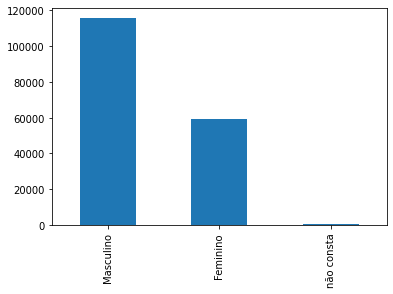

In [ ]:
import matplotlib.pyplot as plt

contagem = df_analise_pd['sexo'].value_counts()

# Plot the results
contagem.plot(kind='bar')
plt.show()

Seguindo esses dados, os analistas podem ir mais a fundo para buscar entender se há uma correlação com as profissões realizadas por pessoas do sexo masculino, que sofrem mais acidentes, ou se há outro motivo pra sofrerem mais acidentes que o sexo oposto.

## 2) Qual será a profissão mais perigosa?

De maneira similar é possível fazer a plotagem para visualizar quais são as ocupações que aparecem mais vezes, dentre os acidentados.

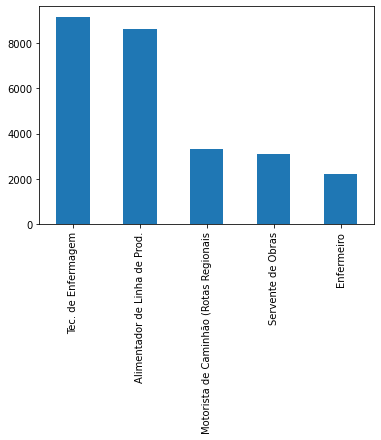

In [ ]:
# o código abaixo remove o "não consta" da contagem e conta quantas vezes cada ocupação aparece na sua coluna
contagem = df_analise_pd[df_analise_pd['ocupacao'] != 'não consta']['ocupacao'].value_counts()

# na hora de plotar é possível pedir apenas pelo "top5"
contagem.head(5).plot(kind='bar')
plt.show()

A partir disso, pode-se verificar que Tecnico de enfermagem aparece mais do que qualquer outro e, ainda assim, "enfermeiro" aparece em quinto lugar, então certamente vale aprofundar no porquê da enfermagem ser um ramo com tantos acidentes.

## 3) Quais são os municípios onde ocorrem mais acidentes?

Por último, é possível utilizar esse método para identificar em qual município ocorreu a maior quantidade de acidentes (destaca-se, no entanto, assim como no caso anterior, que os "não consta" foram retirados da conta, inclusive por haver um enorme número de entradas assim, portanto a resposta que avaliaremos não será tão precisa.

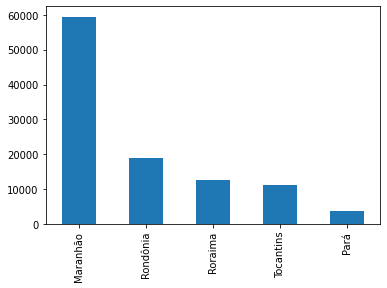

In [ ]:
contagem = df_analise_pd[df_analise_pd['municipio_acidente'] != 'não consta']['municipio_acidente'].value_counts()
contagem.head(5).plot(kind='bar')
plt.show()

# Análises com pyspark

In [ ]:
df_tratado.show(2)

In [ ]:
df_tratado.printSchema()

## Criando colunas com funções de datas

In [ ]:
# convertendo as datas que estão completas, para criar algumas comparações, dentro de colunas novas
df_datas = (df_tratado
     .withColumn('data_acidente', F.to_date(F.col('data_acidente'), 'dd/MM/yyyy'))
     .withColumn('data_nascimento', F.to_date(F.col('data_nascimento'), 'dd/MM/yyyy'))
     .withColumn('data_emissao_CAT', F.to_date(F.col('data_emissao_CAT'), 'dd/MM/yyyy'))
)

In [ ]:
# criando uma coluna nova que informa a idade que a pessoa tinha na época do acidente
df_datas = df_datas.withColumn('idade_epoca_acidente', F.floor(F.months_between(F.col('data_acidente'), F.col('data_nascimento'))/12))

In [ ]:
#criando uma nova coluna que conta quantos dias passaram entre a data do acidente e a emissão do CAT
df_datas = df_datas.withColumn('dif_dias', F.datediff(F.col('data_emissao_CAT'), F.col('data_acidente')))

In [ ]:
df_datas.select('data_nascimento','idade_epoca_acidente', 'data_acidente','data_emissao_CAT', 'dif_dias' ).show()

+---------------+--------------------+-------------+----------------+--------+
|data_nascimento|idade_epoca_acidente|data_acidente|data_emissao_CAT|dif_dias|
+---------------+--------------------+-------------+----------------+--------+
|     1966-09-12|                  55|   2022-02-22|      2022-03-01|       7|
|     1994-05-07|                  27|   2022-02-28|      2022-03-01|       1|
|     1994-01-12|                  28|   2022-02-21|      2022-03-02|       9|
|     1993-10-14|                  28|   2022-02-28|      2022-03-02|       2|
|     1979-06-20|                  42|   2022-02-25|      2022-03-02|       5|
|     1969-10-29|                  52|   2022-02-07|      2022-03-02|      23|
|     1984-12-19|                  37|   2022-02-28|      2022-03-02|       2|
|     1992-08-23|                  29|   2022-02-21|      2022-03-02|       9|
|     1995-09-08|                  26|   2022-02-24|      2022-03-02|       6|
|     1952-07-25|                  69|   2022-02-28|

Como observa-se, foram criadas no df_datas, duas novas colunas contendo informações relevante sobre as outras colunas já existentes a primeira "idade_epoca_acidente" informa a idade da pessoa na época do acidente e a segunda "dif_dias" conta os dias entre a data do acidente e a emissão do CAT

## Analisando com Window functions

In [ ]:
df_tratado.show()

+--------------------+--------------------+---------------------+--------------------+-----+-------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+--------------------+
|   causador_acidente|              CID-10|atividades_empregador|especie_do_beneficio|obito|municipio_empregado|      natureza_lesao|parte_corpo_atingida|     sexo|tipo_acidente|municipio_acidente|municipio_empregador|data_despacho_beneficio|data_acidente|data_nascimento|data_emissao_CAT|            ocupacao|
+--------------------+--------------------+---------------------+--------------------+-----+-------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+--------------------+
|Chao - Superficie...|S63.3 Ruptura Tra...| Fabricacao de Cha...|  

In [ ]:
from pyspark.sql.window import Window

In [ ]:
# o código abaixo cria uma partição sobre o dataframe
w0 = Window.partitionBy(F.col('natureza_lesao')).orderBy(F.col('ocupacao'))

In [ ]:
#RANK
df_rank = df_tratado.withColumn('rank', F.rank().over(w0))

In [ ]:
#DENSE_RANK
df_dense = df_rank.withColumn('dense_rank', F.dense_rank().over(w0))

In [ ]:
df_dense.select(F.col('natureza_lesao'), F.col('ocupacao'), F.col('dense_rank'), F.col('rank')).show()

+--------------------+--------------------+----------+----+
|      natureza_lesao|            ocupacao|dense_rank|rank|
+--------------------+--------------------+----------+----+
|Amputacao ou Enuc...|            Abatedor|         1|   1|
|Amputacao ou Enuc...|            Abatedor|         1|   1|
|Amputacao ou Enuc...|       Administrador|         2|   3|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|Ajudante de Motor...|         3|   4|
|Amputacao ou Enuc...|     Ajust. Mecânico|         4|  11|
|Amputacao ou Enuc...|     Ajust. Mecânico|         4|  11|
|Amputacao ou Enuc...|     Ajust. Mecânico|         4|  11|
|Amputacao ou Enuc...|     Ajust. Mecâni

Acima, foram usadas 2 window functions para criar um dense_rank e um rank das ocupações particionadas pela natureza da lesao, um analista pode ser capaz de tirar dessas funções uma ideia da correlação entre a natureza de cada lesão e a ocupação da pessoa lesionada, mas mais informações certamente tornarão esse quadro mais claro.

## 5 insights utilizando SparkSQL

In [ ]:
df_tratado.write.saveAsTable('inss')

In [ ]:
spark.sql('show tables').show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|  default|     inss|      false|
+---------+---------+-----------+



In [ ]:
spark.sql('select * from inss').show()

+--------------------+--------------------+---------------------+--------------------+-----+-------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+--------------------+
|   causador_acidente|              CID-10|atividades_empregador|especie_do_beneficio|obito|municipio_empregado|      natureza_lesao|parte_corpo_atingida|     sexo|tipo_acidente|municipio_acidente|municipio_empregador|data_despacho_beneficio|data_acidente|data_nascimento|data_emissao_CAT|            ocupacao|
+--------------------+--------------------+---------------------+--------------------+-----+-------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+--------------------+
|Chao - Superficie...|S63.3 Ruptura Tra...| Fabricacao de Cha...|  

### 1) tipos de lesão

In [ ]:
spark.sql('SELECT DISTINCT natureza_lesao FROM inss').show(truncate=False);

+-------------------------------------------+
|natureza_lesao                             |
+-------------------------------------------+
|Queimadura Quimica (Lesao de Tecido Provoca|
|Perda ou Diminuicao Mediatas de Sentido (Au|
|Efeito de Radiacao (Imediato) - Queimadura |
|Amputacao ou Enucleacao                    |
|Queimadura ou Escaldadura - Efeito de Tempe|
|Pneumoconiose (Silicose, Asbestose, Etc.)  |
|Escoriacao, Abrasao (Ferimento Superficial)|
|Inflamacao de Articulacao, Tendao ou Muscul|
|Outras Lesoes, Nic                         |
|Concussao Cerebral                         |
|Contusao, Esmagamento (Superficie Cutanea I|
|Intermacao, Insolacao, Caibra, Exaustao e O|
|Pneumoconiose (Silicose, Asbestose, Etc.   |
|Lesao Imediata, Nic                        |
|Efeito de Radiacao (Mediato - Queimadura D |
|Perda ou Diminuicao de Sentido (Audicao, Vi|
|Doenca Contagiosa ou Infecciosa (Tuberculos|
|Congelamento, Geladura e Outros Efeitos Da |
|Asfixia, Estrangulamento, Afogame

### 2) Informações sobre as pessoas com a ocupação "Desossador"

In [ ]:
spark.sql('SELECT * FROM inss WHERE ocupacao = "Desossador"').show()

+--------------------+--------------------+---------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+----------+
|   causador_acidente|              CID-10|atividades_empregador|especie_do_beneficio|obito| municipio_empregado|      natureza_lesao|parte_corpo_atingida|     sexo|tipo_acidente|municipio_acidente|municipio_empregador|data_despacho_beneficio|data_acidente|data_nascimento|data_emissao_CAT|  ocupacao|
+--------------------+--------------------+---------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+-------------+------------------+--------------------+-----------------------+-------------+---------------+----------------+----------+
|Impacto de Pes. C...|S91.3 Ferim de Ou...| Abate de Reses, E...|                  Pa|  Não|  

### 3) Lista de lugares lesionados

In [ ]:
spark.sql('SELECT DISTINCT parte_corpo_atingida FROM inss').show(truncate=False);

+---------------------------------------------+
|parte_corpo_atingida                         |
+---------------------------------------------+
|Aparelho Circulatorio                        |
|Membros Inferiores, Nic                      |
|Partes Multiplas - Aplica-Se Quando Mais de U|
|Membros Superiores, Nic                      |
|Aparelho Genito-Urinario                     |
|Pe (Exceto Artelhos)                         |
|Antebraco (Entre O Punho e O Cotovelo)       |
|Abdome (Inclusive Orgaos Internos            |
|Mao (Exceto Punho ou Dedos                   |
|Ouvido (Externo, Medio, Interno, Audicao e Eq|
|Torax (Inclusive Orgaos Internos)            |
|Olho (Inclusive Nervo Otico e Visao          |
|Ombro                                        |
|Perna (Do Tornozelo, Exclusive, ao Joelho, Ex|
|Olho (Inclusive Nervo Otico e Visao)         |
|Joelho                                       |
|Cranio (Inclusive Encefalo)                  |
|Articulacao do Tornozelo               

### 4) Tipos de acidente

In [ ]:
spark.sql('SELECT DISTINCT tipo_acidente FROM inss').show(truncate=False);

+-------------+
|tipo_acidente|
+-------------+
|Trajeto      |
|Doença       |
|Típico       |
|não consta   |
+-------------+



### 5) Os municípios onde ocorreram os acidentes

In [ ]:
spark.sql('SELECT DISTINCT municipio_acidente FROM inss').show(truncate=False);

+------------------+
|municipio_acidente|
+------------------+
|Ceará             |
|Piauí             |
|Alagoas           |
|Roraima           |
|Pernambuco        |
|Amazonas          |
|Acre              |
|Sergipe           |
|Rio Grande Norte  |
|Rondônia          |
|Maranhão          |
|Tocantins         |
|Paraíba           |
|Pará              |
|Amapá             |
|não consta        |
+------------------+



# Upload do dataset tratado

In [ ]:
# salvando localmente o df_tratado do pyspark
df_tratado.write.format('csv').save('/content/temporário', header=True)

In [ ]:
base_dados_tratada = pd.read_csv('/content/temporário/INSS_base_dados_tratada.csv')

## Para a gcp

In [ ]:
# FAZER O ACESSO A BUCKET
client = storage.Client()

# CRIAR UMA VARIÁVEL PARA RECEBER O NOME DA BUCKET
bucket = client.get_bucket('bc_26_jose_datasets')

# enviar o csv criado com o dataframe tratado para a bucket
# além de ser renomeado manualmente ele foi removido da pasta "/content/temporário", por isso esse caminho não consta no código
blob = bucket.blob('INSS_base_dados_tratada.csv')
blob.upload_from_filename('INSS_base_dados_tratada.csv')

## Para o mongoDB

In [ ]:
# conector do Mongo Atlas
uri = "mongodb+srv://jose-soulcode.hzghbxc.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-5657352609111553935.pem')

In [ ]:
# criação de uma nova coleção
dbt = client['tratado']
colecaot = dbt['base_tratada']

In [ ]:
# verificando a conexão por meio da quantidade de documentos da coleção
doc_count = colecaot.count_documents({})
print(doc_count)

0


In [ ]:
# inserção do DF pandas com o dataframe tratado, para o mongoDB, em foma de dicionário, 
# assim como foi feito o upload dos dataframes com os dados originais
# o DF estava grande demais para ser enviado para o Mongo então será enviado em pedaços ("chunks")
chunk_size = 1000
# definido o tamanho do chunk, calcula-se a quantidade de chunks
num_chunks = base_dados_tratada.shape[0] // chunk_size + 1

# depois itera sobre os chunks
for i in range(num_chunks):
    # e cria um .loc em cima dele
    chunk = base_dados_tratada.loc[i*chunk_size:(i+1)*chunk_size-1]

    # aqui converte-se cada chunk para uma lista de dicionários
    chunk_dict = chunk.to_dict('records')

    # e aqui eles são inseridos no MongoDB
    colecaot.insert_many(chunk_dict)

In [ ]:
# conferindo que entrou
doc_count = colecaot.count_documents({})
linhas_df_tratado = base_dados_tratada.shape[0]
if doc_count == linhas_df_tratado:
  print(f'o documento foi inserido com êxito, contendo {doc_count} entradas')
else:
  print(f'nem todas as linhas do Dataframe foram carregadas, apenas {doc_count}')

o documento foi inserido com êxito, contendo 175611 entradas


## Para o servidor MySQL

In [ ]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 45.9 MB/s eta 0:00:00


In [ ]:
import mysql.connector
from mysql.connector import Error

In [ ]:
# FUNÇÃO PARA CONECTAR AO BANCO DE DADOS SQL
def conexao_db(servidor, usuario, senha, nome_do_banco):
  conexao = None
  try:
    conexao = mysql.connector.connect(host=servidor, user=usuario, passwd=senha, database=nome_do_banco)
    print(f'Conectado ao banco {nome_do_banco} com êxito')
  except:
    print(f'Erro ao conectar ao banco {nome_do_banco}')
  
  return conexao

In [ ]:
# o código abaixo usará a função acima para conectar com minha instância rodando um servidor mySQL
# a database "inss já foi criada lá com esse propósito"
conexao = conexao_db('34.83.42.34', 'root', 'root', 'inss')

Erro ao conectar ao banco projeto_final_data_search


In [ ]:
#criação do cursos
cursor = conexao.cursor()

# carregar o arquivo csv para a mesa inss da database no MySQL
query = "LOAD DATA INFILE 'INSS_base_dados_tratada.csv' INTO TABLE inss"
cursor.execute(query)

# Commit em cima das mudanças
conexao.commit()

# fechamento do cursor e da conexao
cursor.close()
conexao.close()
#tentar fazer esse código funcionar